In [1]:
import pylab
import imageio
import numpy as np
import scipy
import scipy.sparse.linalg
import scipy.io
import matplotlib.pyplot as plt
import numpy.linalg
from numpy import inf
import scipy.io as sio
from matplotlib import animation

In [2]:
# filename = 'funny_cats_1_512kb.mp4'
# vid = imageio.get_reader(filename,  'ffmpeg')
# nums = [0, 50]
# for num in nums:
#     fig = pylab.figure()
#     fig.suptitle('image #{}'.format(num), fontsize=20)
#     pylab.imshow(image)
# pylab.show()

Loading `*.mat`
===

In [4]:
%%time
X_spa_r2 = np.asarray(sio.loadmat('mat_results_mode2')['X_spa'])
X_dmd_r2 =np.asarray(sio.loadmat('mat_results_mode2')['X_dmd_lr'])
Lambda_r2 = np.asarray(sio.loadmat('mat_results_mode2')['Lambda'])

X_spa_r20 = np.asarray(sio.loadmat('mat_results_mode20')['X_spa'])
X_dmd_r20 =np.asarray(sio.loadmat('mat_results_mode20')['X_dmd_lr'])
Lambda_r20 = np.asarray(sio.loadmat('mat_results_mode20')['Lambda'])

X_spa_r10 = np.asarray(sio.loadmat('mat_results_mode10')['X_spa'])
X_dmd_r10 =np.asarray(sio.loadmat('mat_results_mode10')['X_dmd_lr'])
Lambda_r10 = np.asarray(sio.loadmat('mat_results_mode10')['Lambda'])

X_spa_r50 = np.asarray(sio.loadmat('mat_results_mode50')['X_spa'])
X_dmd_r50 =np.asarray(sio.loadmat('mat_results_mode50')['X_dmd_lr'])
Lambda_r50= np.asarray(sio.loadmat('mat_results_mode50.mat')['Lambda'])

CPU times: user 36.5 s, sys: 3.7 s, total: 40.2 s
Wall time: 48.9 s


DMD Sparse Matrix has shape:  (99, 76800)
DMD Low Rank Matrix has shape:  (99, 76800)


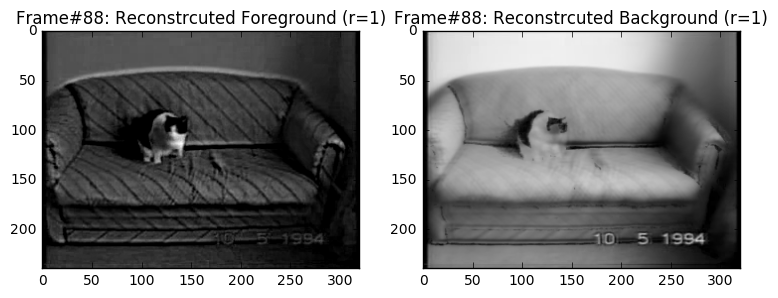

In [5]:
print("DMD Sparse Matrix has shape: ", X_spa_r2.shape)
print("DMD Low Rank Matrix has shape: ", X_dmd_r2.shape)

# X_spa = np.reshape(X_spa,99,240,320)
image_sample_fg = np.reshape(X_spa_r2[88,:],(240,320))
image_sample_bg = np.reshape(X_dmd_r2[88,:],(240,320))

plt.subplot(1,2,1)
plt.imshow(image_sample_fg,cmap='gray')
plt.title("Frame#88: Reconstrcuted Foreground (r=1)")


plt.subplot(1,2,2)
plt.imshow(image_sample_bg,cmap='gray')
plt.title("Frame#88: Reconstrcuted Background (r=1)")

fig = plt.gcf()
fig.set_size_inches(9,4)
fig.savefig('example_reconstruction.png', dpi=100)

plt.show()

Eigenvalues Spectral Distribution
===

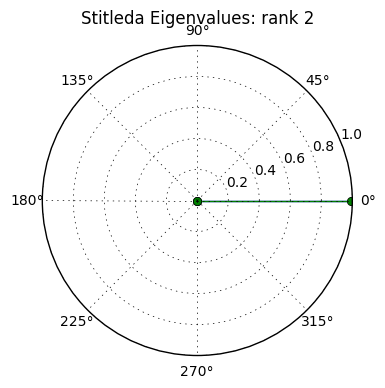

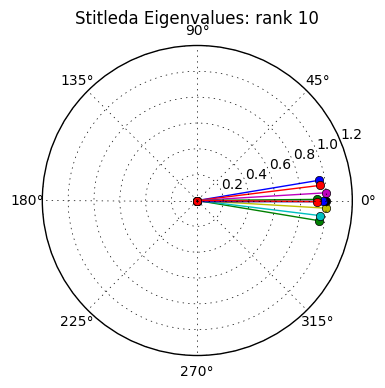

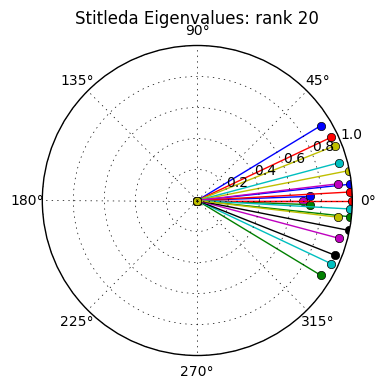

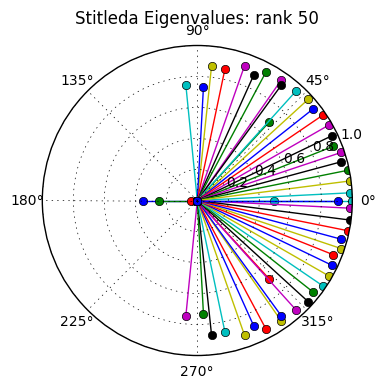

In [70]:
%matplotlib inline  
plt.figure(1)
for x in Lambda_r2:
    plt.polar([0,np.angle(x)],[0,abs(x)],marker='o')

plt.title("Stitleda Eigenvalues: rank 2")
plt.figure(1).set_size_inches(4,4)
plt.savefig('r2_Lambda_Stitleda.png', dpi=100)

plt.figure(2)
for x in Lambda_r10:
    plt.polar([0,np.angle(x)],[0,abs(x)],marker='o')

plt.title("Stitleda Eigenvalues: rank 10")
plt.figure(2).set_size_inches(4,4)
plt.savefig('r10_Lambda_Stitleda.png', dpi=100)


plt.figure(3)
for x in Lambda_r20:
    plt.polar([0,np.angle(x)],[0,abs(x)],marker='o')

plt.title("Stitleda Eigenvalues: rank 20")
plt.figure(3).set_size_inches(4,4)
plt.savefig('r20_Lambda_Stitleda.png', dpi=100)

plt.figure(4)
for x in Lambda_r50:
    plt.polar([0,np.angle(x)],[0,abs(x)],marker='o')

plt.title("Stitleda Eigenvalues: rank 50")
plt.figure(4).set_size_inches(4,4)
plt.savefig('r50_Lambda_Stitleda.png', dpi=100)

plt.show()

[[ 0.99988681]
 [ 0.98936817]]


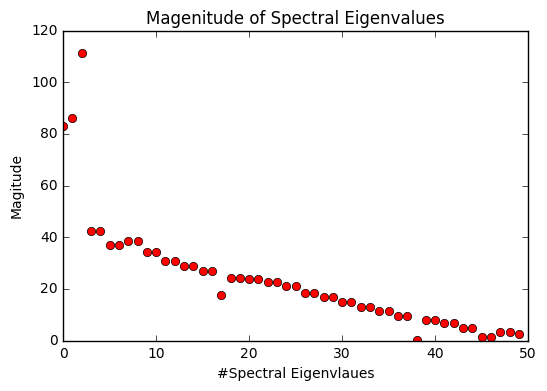

In [7]:
# omega of the first 50 modes
print(Lambda_r2)

delta_t = 0.04 
Omega_r50 = np.log(Lambda_r50)/delta_t

plt.figure()
plt.plot(abs(Omega_r50),'ro')
plt.title("Magenitude of Spectral Eigenvalues")
plt.xlabel("#Spectral Eigenvlaues")
plt.ylabel("Magitude")
plt.savefig('abs_omega50', dpi=100)


plt.show()

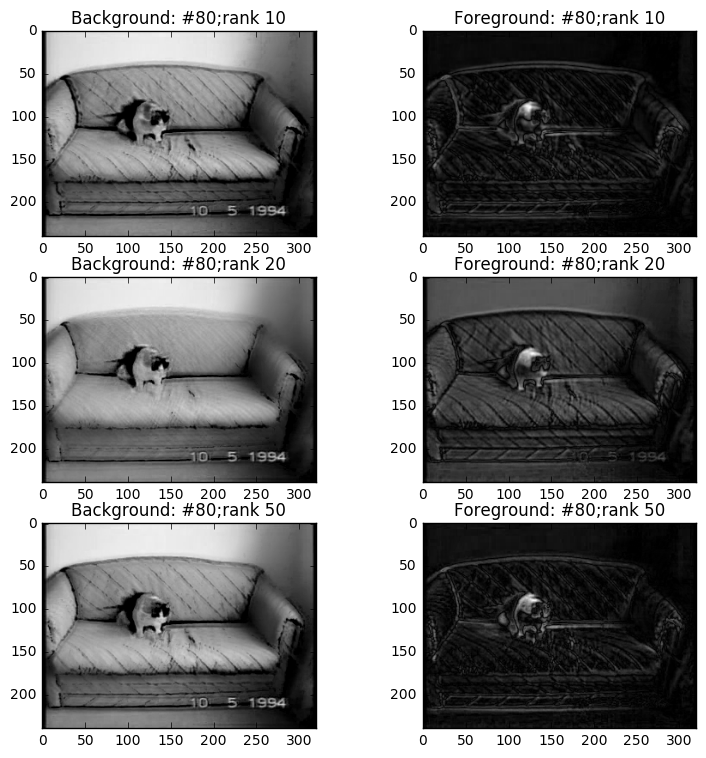

In [9]:
%matplotlib inline  

plt.figure(5)


plt.subplot(3,2,1)
plt.imshow(np.reshape(np.abs(X_spa_r10)[80,:],(240,320)),cmap='gray')
plt.title("Background: #80;rank 10")

plt.subplot(3,2,2)
plt.imshow(np.reshape(np.abs(X_dmd_r10)[80,:],(240,320)),cmap='gray')
plt.title("Foreground: #80;rank 10")

plt.subplot(3,2,3)
plt.imshow(np.reshape(np.abs(X_spa_r20)[80,:],(240,320)),cmap='gray')
plt.title("Background: #80;rank 20")

plt.subplot(3,2,4)
plt.imshow(np.reshape(np.abs(X_dmd_r20)[80,:],(240,320)),cmap='gray')
plt.title("Foreground: #80;rank 20")

plt.subplot(3,2,5)
plt.imshow(np.reshape(np.abs(X_spa_r50)[80,:],(240,320)),cmap='gray')
plt.title("Background: #80;rank 50")

plt.subplot(3,2,6)
plt.imshow(np.reshape(np.abs(X_dmd_r50)[80,:],(240,320)),cmap='gray')
plt.title("Foreground: #80;rank 50")

plt.figure(5).set_size_inches(9,9)
plt.savefig('frame80_allRanks.png', dpi=100)

plt.show()

Error Exam
==


(99, 76800)


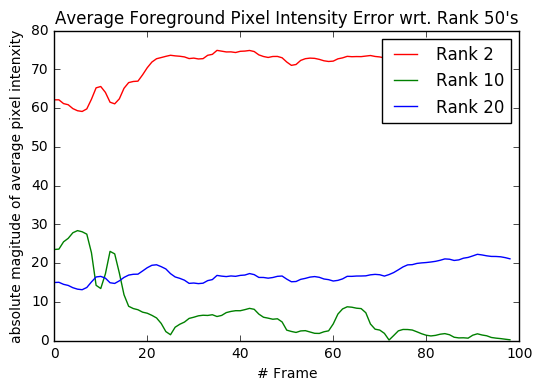

In [64]:
print(X_spa_r50.shape)
err_r2 = np.abs(np.mean(X_spa_r50 - X_spa_r2, axis=1))
err_r10 = np.abs(np.mean(X_spa_r50 - X_spa_r10, axis=1))
err_r20 = np.abs(np.mean(X_spa_r50 - X_spa_r20, axis=1))
err_r50 = np.abs(np.mean(X_spa_r50 - X_spa_r50, axis=1))


plt.figure(6)
plt.plot(err_r2,'r', label = 'Rank 2')
plt.plot(err_r10,'g', label = 'Rank 10')
plt.plot(err_r20,'b', label = 'Rank 20')
plt.xlabel('# Frame')
plt.ylabel('absolute magitude of average pixel intenxity')

plt.title("Average Foreground Pixel Intensity Error wrt. Rank 50's")
pylab.legend()


plt.savefig('err_wrt_r50.png', dpi=100)

plt.show()

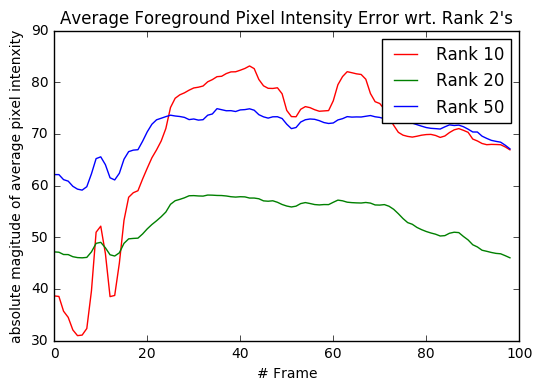

In [68]:
err_r10_wrt_r2 = np.abs(np.mean(X_spa_r10 - X_spa_r2, axis=1))
err_r20_wrt_r2 = np.abs(np.mean(X_spa_r20 - X_spa_r2, axis=1))
err_r50_wrt_r2 = np.abs(np.mean(X_spa_r50 - X_spa_r2, axis=1))


plt.figure(7)
plt.plot(err_r10_wrt_r2,'r', label = 'Rank 10')
plt.plot(err_r20_wrt_r2,'g', label = 'Rank 20')
plt.plot(err_r50_wrt_r2,'b', label = 'Rank 50')
plt.xlabel('# Frame')
plt.ylabel('absolute magitude of average pixel intenxity')

plt.title("Average Foreground Pixel Intensity Error wrt. Rank 2's")
pylab.legend()
plt.savefig('err_wrt_r2.png', dpi=100)

plt.show()

Animation: visualizing Background `X_dmd_lr` & Foreground `X_spa`
===


In [ ]:
# ## FG: frame 0-100
# %matplotlib notebook

# fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.ion()

# fig.show()
# fig.canvas.draw()

# for i in range(0,99):
#     ax.clear()
#     ax.imshow(np.reshape(np.abs(X_spa_r1)[i,:],(240,320)),cmap='gray')
#     fig.canvas.draw()
#     print(i)